# TP2: Regresión del valor de valor medio de casas en distritos de California
## Integrantes:
- Emiliano Uriel Martino
- Juan Pablo Hagata
- Fausto Juárez Yélamos
- Carolina Perez Omodeo
- Diego José Araujo Arellano


Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, 
EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada 
observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU 
publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

Y el target es:

- `MedHouseVal`: Mediana del costo de casas en el bloque (en unidades de a $100.000)

## Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.
2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?
3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del 
modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su 
respuesta.
4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.
5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el 
mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.
6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse 
reducido?

## Resolución

#### Importación de paquetes y dataset

In [1]:
# ---------------- Paquetes | Funciones a utilizar ----------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [2]:
# ---------------- Carga de dataset ----------------

california_housing = fetch_california_housing()

#### Preparación de los datos

In [3]:
# ---------------- Definición de variables ----------------

x = california_housing.data # Variables predictoras
y = california_housing.target # Variable a predecir

# Transformación a dataframe
x = pd.DataFrame(x, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Se une todo en un dataframe
df_california = pd.concat([x, y], axis = 1)


In [4]:
# ---------------- Información del dataset ----------------

df_california.info()
df_california.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

##### Correlación entre atributos y atributos con target

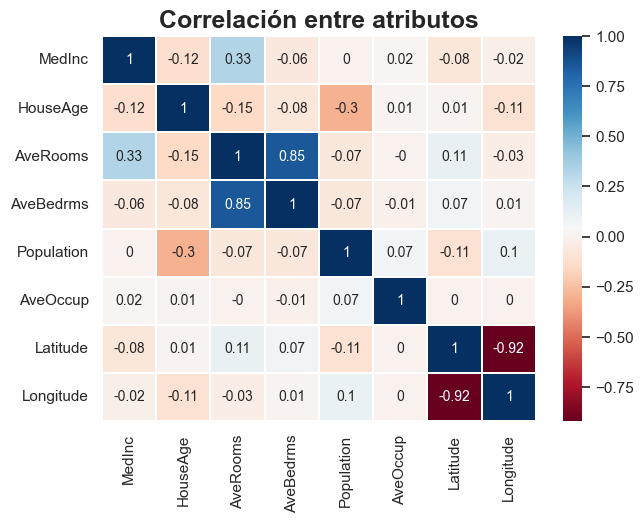

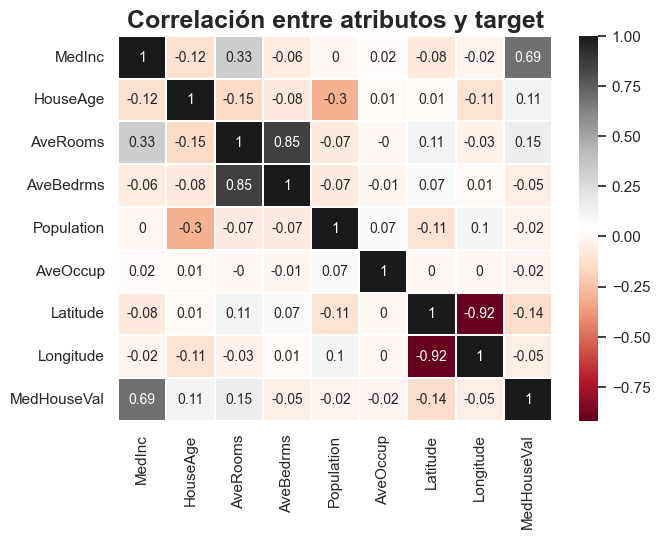

In [5]:
# Heatmap atributos | atributos + target

plt.figure(figsize=(7, 5))
matriz_correlacion = df_california.drop('MedHouseVal', axis=1).corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, annot_kws={"size": 10}, 
            linewidth=.1, cmap='RdBu').set_title('Correlación entre atributos', 
                                                      size=18, fontweight="bold")

plt.figure(figsize=(7, 5))
matriz_correlacion = df_california.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, annot_kws={"size": 10}, 
            linewidth=.1, cmap='RdGy').set_title('Correlación entre atributos y target', 
                                                      size=18, fontweight="bold")
plt.show()

Los atributos que parecen más correlacionados entre sí son *AveRooms - AveBedrms* presentando una correlación fuerte y positiva, lo cúal tiene sentido dado que ambos hacen referencia a cantidad promedio de espacios (particiones) por hogar. Por otro lado existe una correlación fuerte negativa entre *Latitude-Longitude*. 

Con respecto a variables que presenten correlación lineal con la variable objetivo, se evidencia que el ingreso medio (*MedInc*) es quien tiene mayor correlación, en este caso positiva (i.e. el valor medio de la casa aumenta en el mismo sentido que aumenta el ingreso medio del bloque considerado).

### 2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

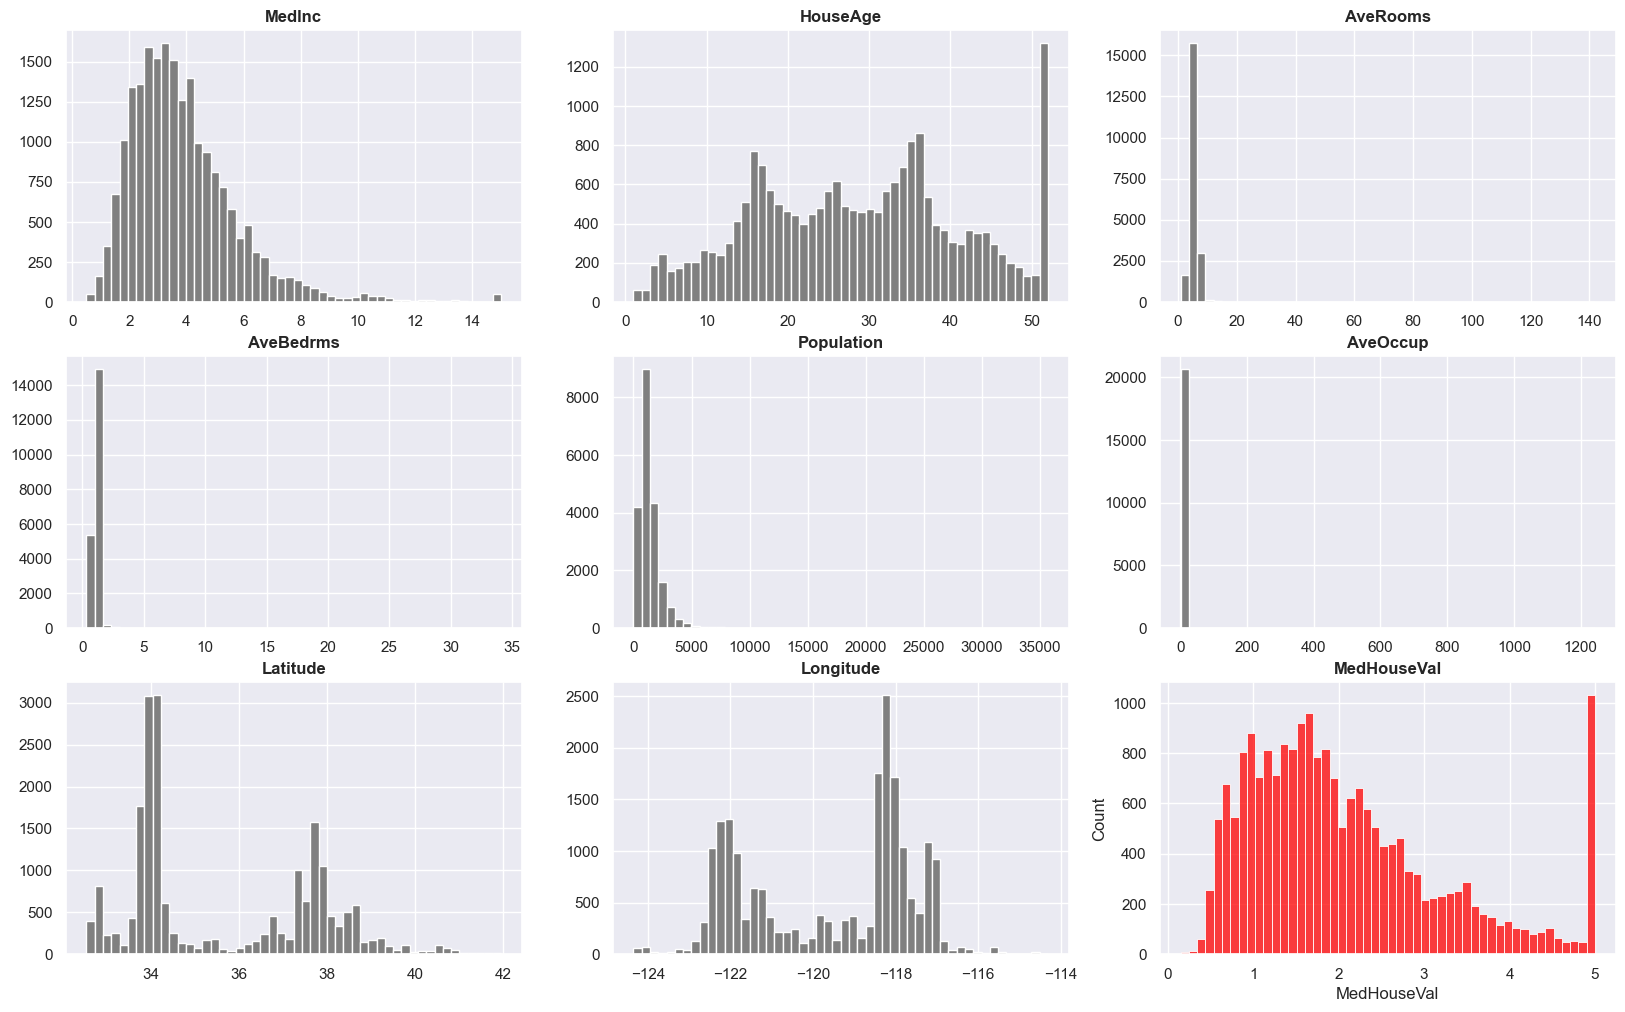

In [54]:
# Histogramas de target | atributos
fig, axs = plt.subplots(3, 3, figsize=(20, 12))


for ax, column in zip(axs.flatten(), df_california.columns):

    if column == 'MedHouseVal':
        sns.histplot(df_california[column], bins=50,
             color="red").set_title(column, size=12, fontweight="bold")
    else:
        ax.hist(df_california[column], bins=50, color = "gray")
        ax.set_title(column, size=12, fontweight="bold")

plt.show()

Si bien las variables *MedInc* y *MedHouseVal* presentan formas similares a *"campanas"*, no podrían provenir de distribuciones gaussianas dado que no son exclusivamente simétricas (presentan asimetría positiva), incluso para distintos valores de ancho de ventana (*bins*). 

El resto de las variables se presentan con distribuciones unimodales (*AveRoom, AveBedrms, Population, AveOccup*) lejos de una forma gaussiana, bimodales (*Latitude, Longitude*), o multimodal (*HouseAge*).

### 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [8]:
# ---------------- Split de datos para entrenamiento | validación ----------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
# ---------------- Escalamiento de datos ----------------

# Debido a las diferentes unidades de medida que tienen las variables predictoras,
# habría que escalar los valores.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lo transformamos en DataFrames
x_train_scaled = pd.DataFrame(x_train_scaled, columns=california_housing['feature_names'])
x_test_scaled = pd.DataFrame(x_test_scaled, columns=california_housing['feature_names'])

#### Modelo de regresión con datos de entrenamiento

In [10]:
# ---------------- Modelo de regresión ----------------

regresion = LinearRegression().fit(x_train_scaled, y_train)

# ---------------- Valores de intercepto | coeficientes ----------------

coeficientes = pd.DataFrame(data={'nombres' : x_train_scaled.columns,
                   'coef.' : regresion.coef_})
print(f"El valor del intercepto es {round(regresion.intercept_,4) }")
print(f"Los valores de los coeficientes son:")
coeficientes

El valor del intercepto es 2.0692
Los valores de los coeficientes son:


,nombres,coef.
0,MedInc,0.849222
1,HouseAge,0.122119
2,AveRooms,-0.299558
3,AveBedrms,0.348410
4,Population,-0.000884
5,AveOccup,-0.041698
6,Latitude,-0.893856
7,Longitude,-0.868617


In [57]:
# ---------------- Predicción con datos de entrenamiento ----------------

y_pred = regresion.predict(x_train_scaled)

# ---------------- Varianza total ----------------

print(f'Suma de cuadrados total: {round(np.sum((y_train - np.mean(y_train))**2),2)}, con N = {y_train.shape[0]}')
varianza_total = np.var(y_train)
print(f'La varianza total de la variable dependiente es {round(varianza_total, 4)}.')

print(' ')

# ---------------- Varianza explicada por el modelo ---------------- 
print(f'Suma de cuadrados de variable dependiente explicada por el modelo es {round(np.sum((y_pred - np.mean(y_train))**2),2)}, con N = {y_train.shape[0]}')

varianza_explicada = r2_score(y_train, y_pred) * varianza_total 
print(f'La varianza de la variable dependiente explicada por el modelo es {round(varianza_explicada, 4)}.')



Suma de cuadrados total: 19355.93, con N = 14448
La varianza total de la variable dependiente es 1.3397.
 
Suma de cuadrados de variable dependiente explicada por el modelo es 11794.46, con N = 14448
La varianza de la variable dependiente explicada por el modelo es 0.8163.


La varianza total representa la variabilidad total presente en la variable objetivo (target). En este caso, el valor de 1.3397 indica que existe una considerable dispersión en los valores del target.
La varianza explicada indica la cantidad de variabilidad en el target que es capturada por el modelo de regresión lineal. En este caso, el valor de 0.8163 sugiere que el modelo explica aproximadamente el 60.9% de la variabilidad total del target.

Basándonos en los valores de varianza total y varianza explicada, podemos concluir que el modelo de regresión lineal está capturando una parte significativa del comportamiento del target. Sin embargo, aún queda un 39.1% de variabilidad sin explicar por el modelo.

### 4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

In [12]:
# ---------------- Cálculo de métricas de validación del modelo ----------------

y_pred_test = regresion.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("R-cuadrado en test:", r2)
print("Error absoluto medio:", mae)
print("Error cuadratico medio:", mse)


R-cuadrado en test: 0.5957702326061665
Error absoluto medio: 0.5272474538305952
Error cuadratico medio: 0.5305677824766752


### 5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.

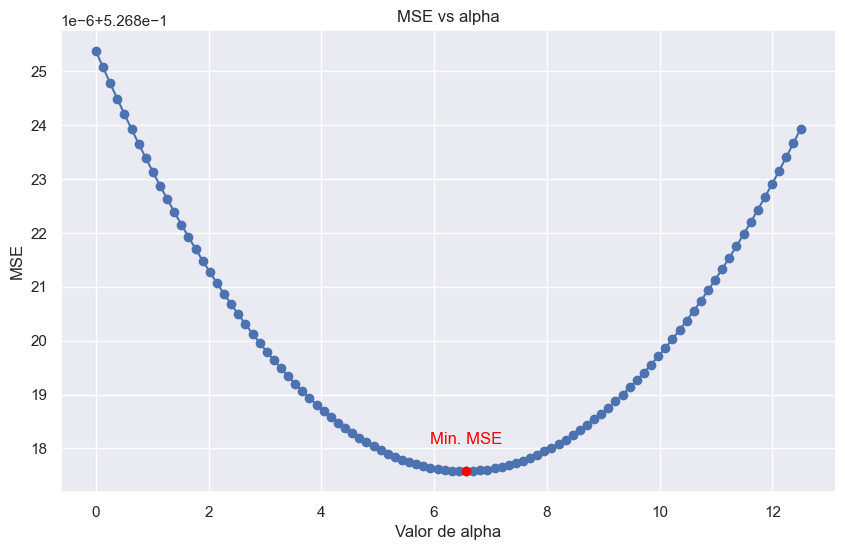

Mejor valor de alpha: 6.5657


In [21]:
# ---------------- Regresión de Ridge | Elección de alpha ----------------

alphas = np.linspace(0, 12.5, 100)
ridge_cv_scores = []

for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha)
    mse_scores = cross_val_score(ridge_regression, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    ridge_cv_scores.append(-mse_scores.mean())

# ---------------- Gráfico de elección de alpha ----------------

plt.figure(figsize=(10, 6))

min_mse_x = alphas[np.argmin(ridge_cv_scores)]
min_mse_y = min(ridge_cv_scores)

plt.plot(alphas, ridge_cv_scores, marker='o')
plt.plot(alphas[np.argmin(ridge_cv_scores)], min(ridge_cv_scores), marker = 'o', color = 'red')
plt.text(min_mse_x, min_mse_y+0.0000005, "Min. MSE", horizontalalignment='center', color = 'red')
plt.xlabel('Valor de alpha')
plt.ylabel('MSE')
plt.title('MSE vs alpha')
plt.show()

# ---------------- Mejor valor de alpha ----------------

best_alpha = alphas[np.argmin(ridge_cv_scores)]
print(f'Mejor valor de alpha: {round(best_alpha,4)}')

### 6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [14]:
 # ---------------- Modelo de regresión lineal simple (Métricas) ----------------
y_pred_lr = regresion.predict(x_test_scaled)

 # Métricas de evaluación para la regresión lineal simple
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Regresión Lineal - MSE: {round(mse_lr,8)}, MAE: {round(mae_lr,8)}") 

 # ---------------- Modelo de regresión Ridge con alpha=best_alpha (Métricas) ----------------

ridge_regression = Ridge(alpha=best_alpha).fit(x_train_scaled, y_train)
y_pred_ridge = ridge_regression.predict(x_test_scaled)

# Métricas de evaluación para la mejor regresión de Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Regresión Ridge  - MSE: {round(mse_ridge,8)}, MAE: {round(mae_ridge,8)}")

 # ---------------- Comparación de resultados  ----------------
 
if mse_ridge < mse_lr and mae_ridge < mae_lr:
    print("La regresión Ridge proporciona mejores resultados que la regresión lineal.")
else:
    print("La regresión lineal proporciona mejores resultados que la regresión Ridge.") 

Regresión Lineal - MSE: 0.53056778, MAE: 0.52724745
Regresión Ridge  - MSE: 0.53041492, MAE: 0.52722171
La regresión Ridge proporciona mejores resultados que la regresión lineal.


El modelo podría estar mejorando dada la regularización que aplica Ridge, haciendo que los coeficientes del modelo tiendan a cero (aunque no sean exactamente iguales a cero), reduciendo así la influencia que puedan tener predictores no tan relevantes, minimizando el sobreajuste y disminuyendo la varianza.

Ridge reduce el error de varianza, dado que disminuye el valor de los coeficientes de regresión y esto ayuda a que el modelo no sea tan sensible a los datos de entrada (entrenamiento), reduciendo así el sobreajuste.